****
<a id='lesson-2'></a>
# Lesson-2: Logistic Map
****

## Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.

## Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial. 
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems. 

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map

## Task-1
Write a function that will take as input the following: 
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$. 
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.4, 5.52
1. Comment



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import scipy.optimize as opt
%matplotlib inline

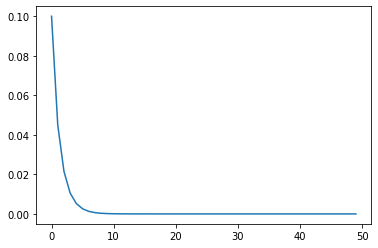

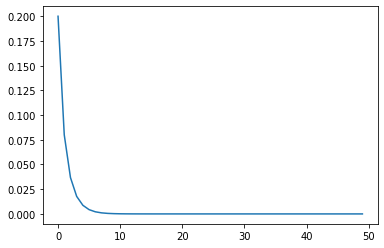

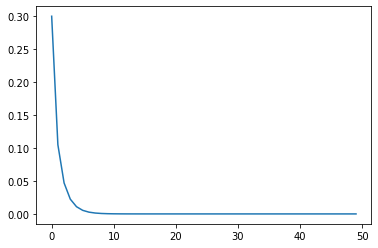

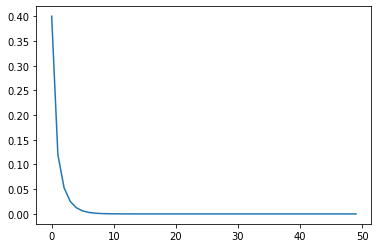

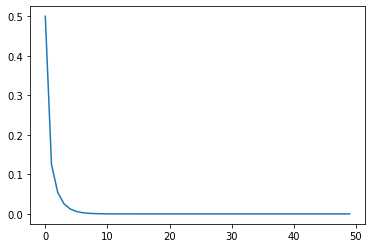

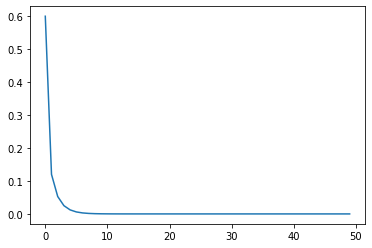

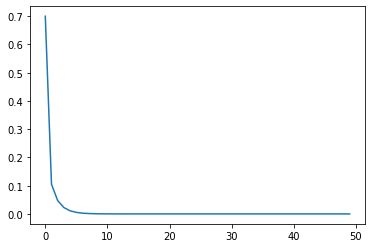

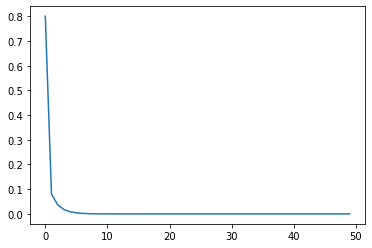

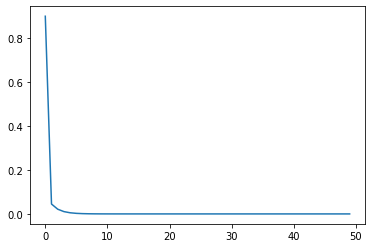

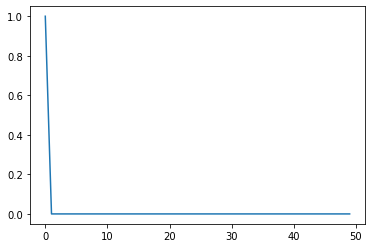

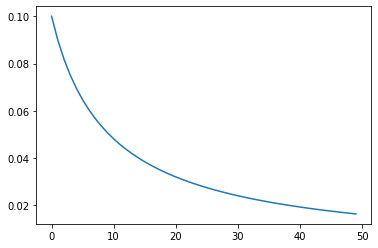

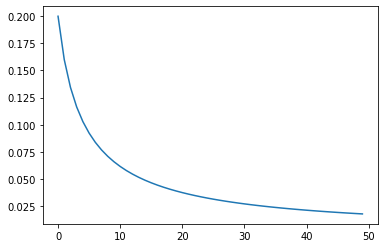

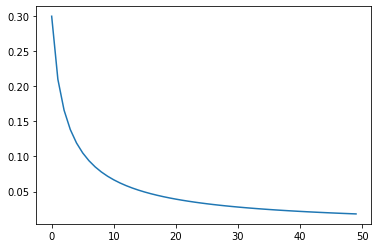

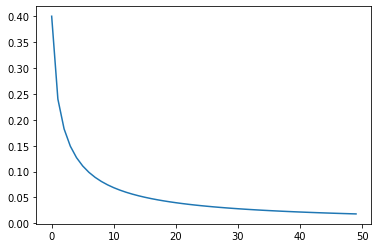

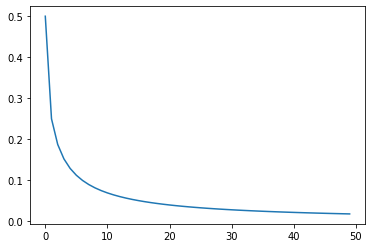

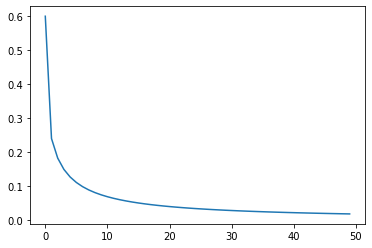

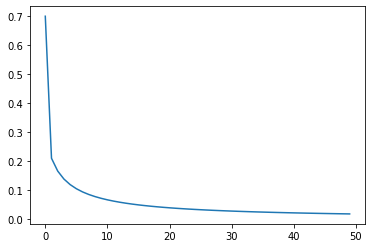

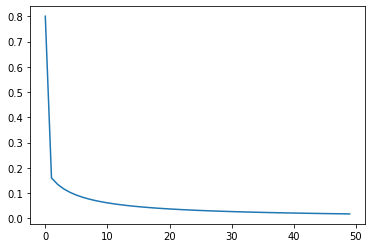

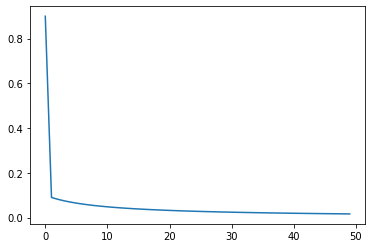

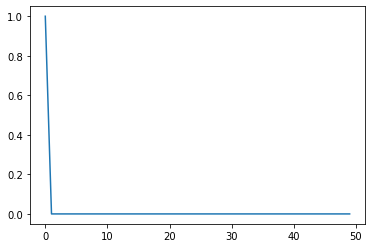

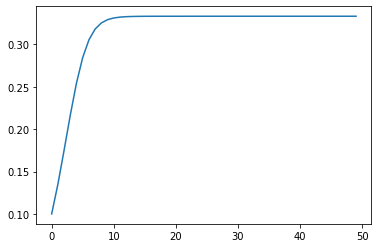

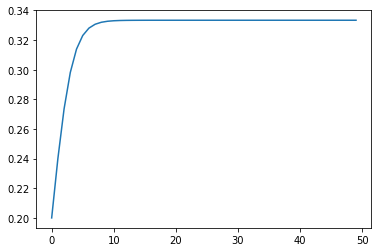

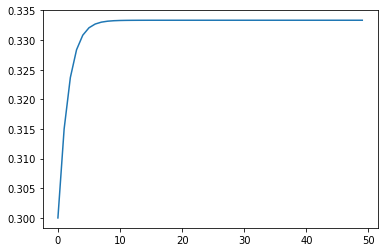

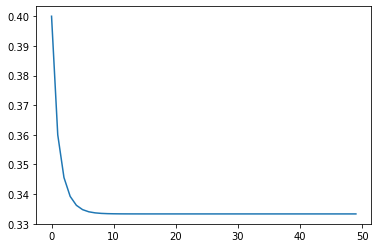

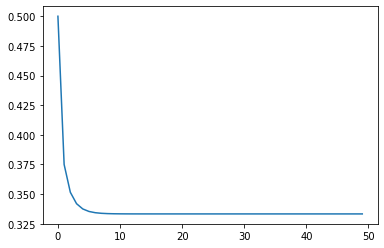

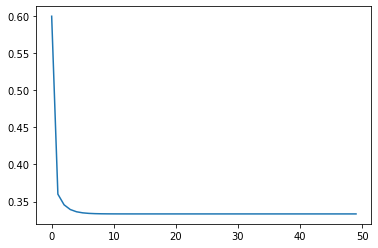

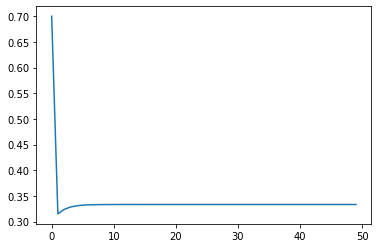

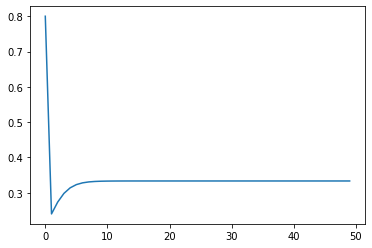

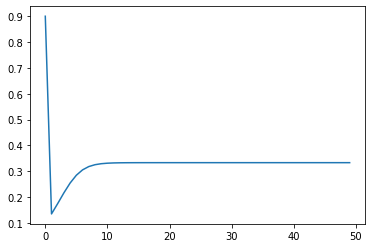

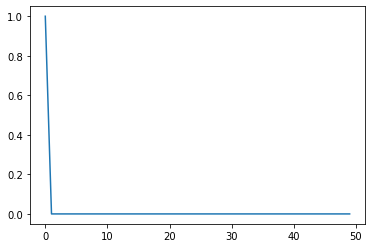

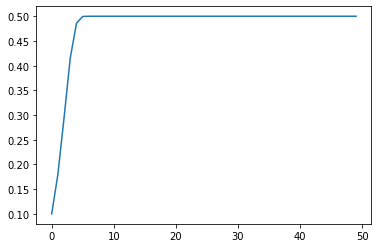

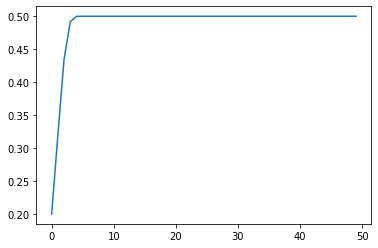

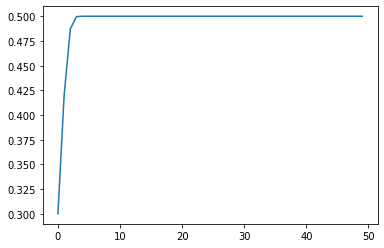

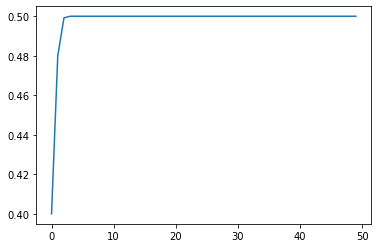

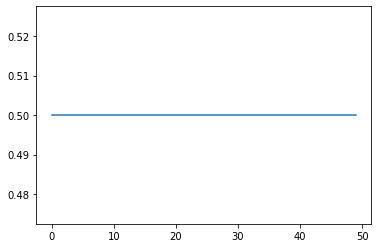

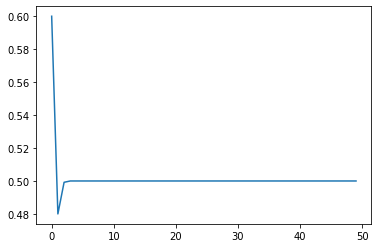

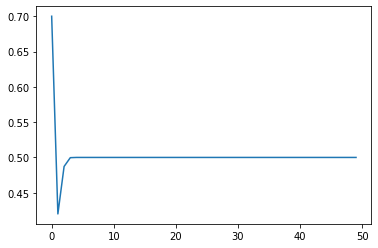

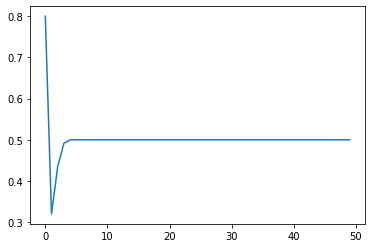

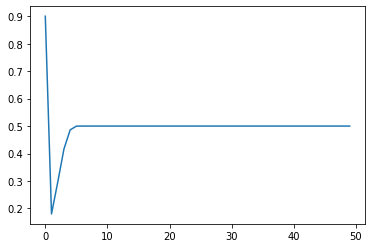

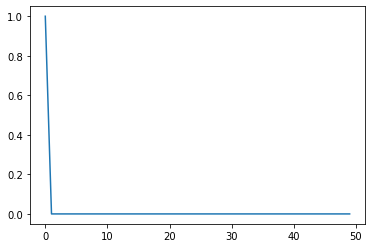

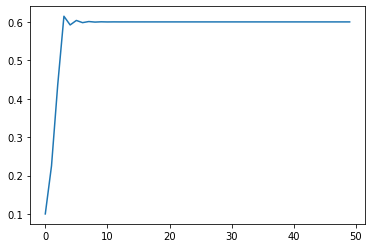

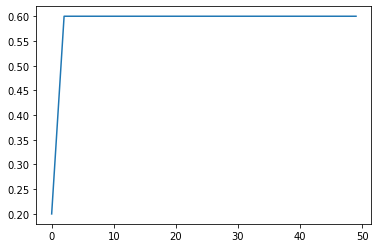

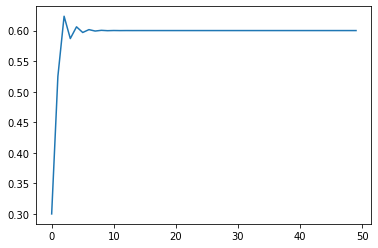

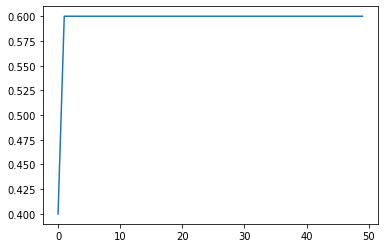

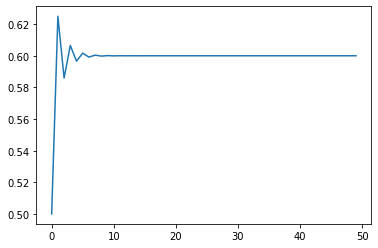

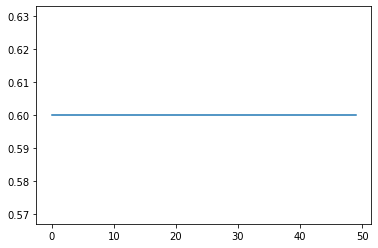

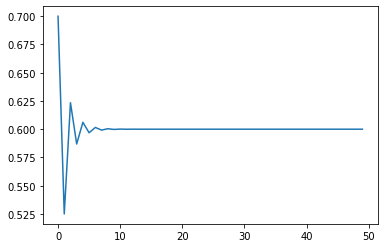

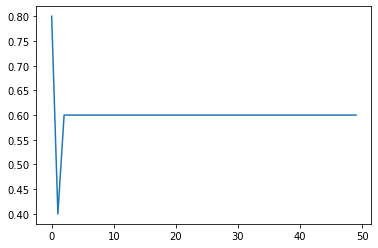

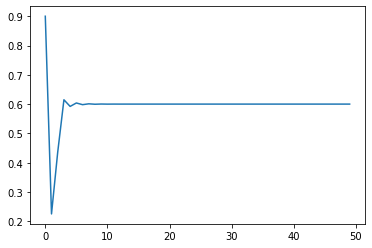

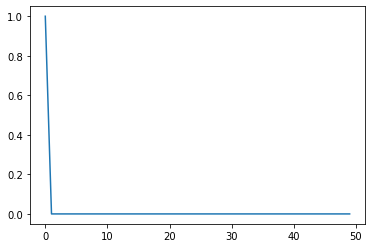

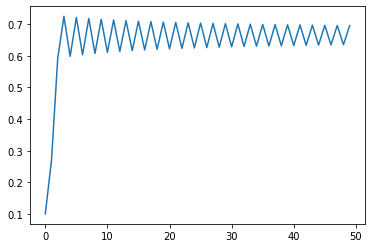

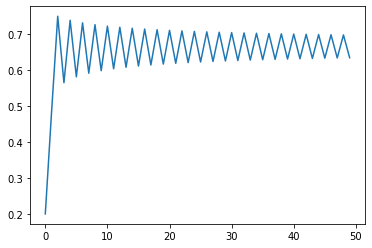

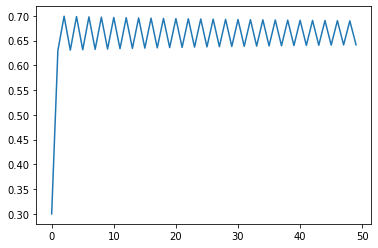

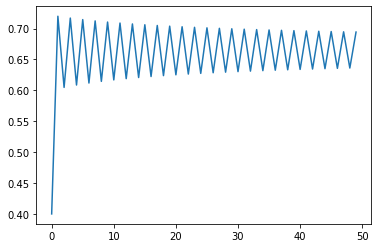

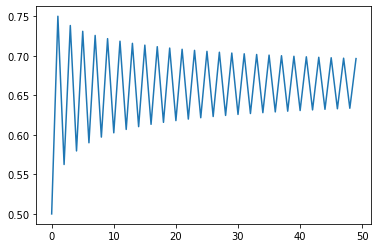

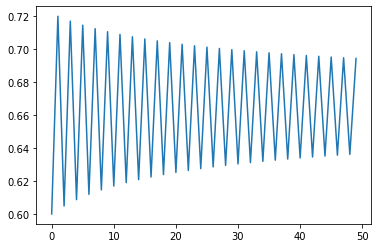

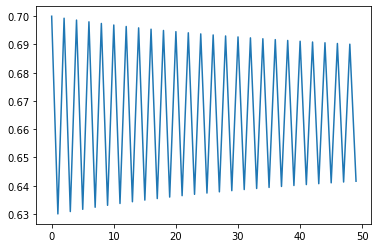

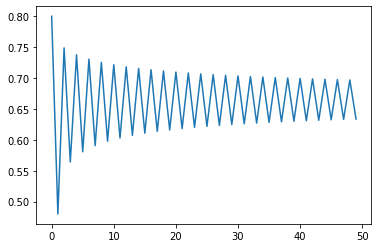

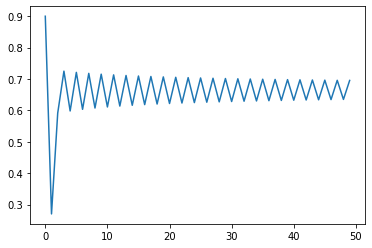

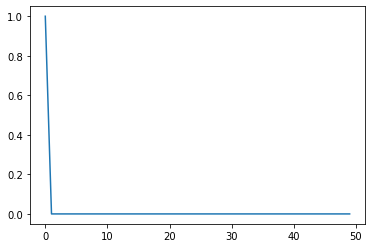

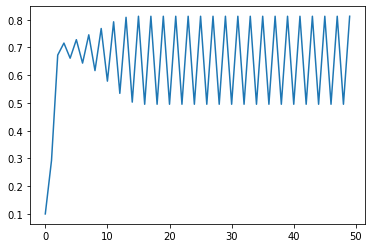

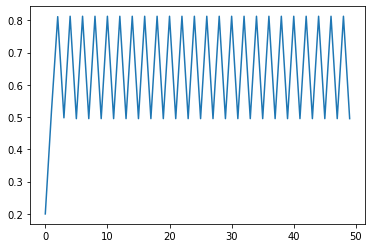

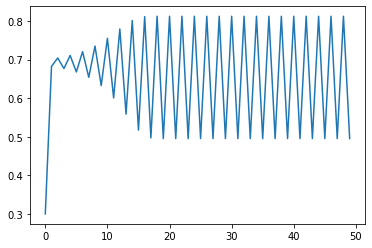

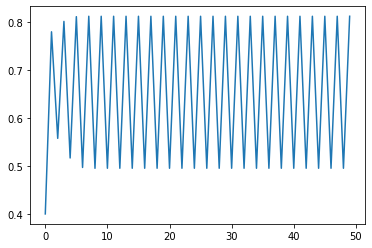

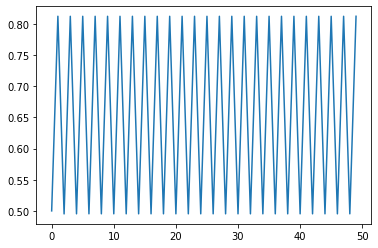

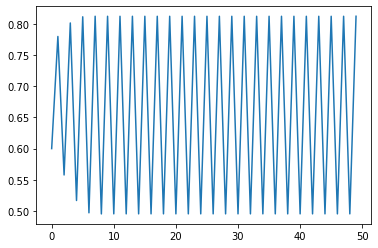

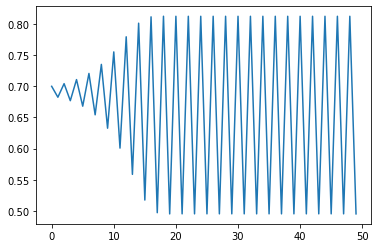

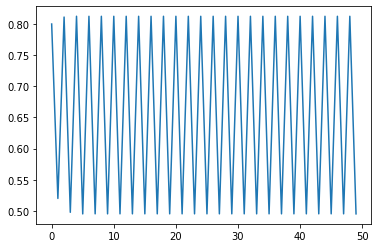

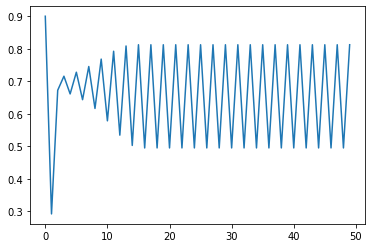

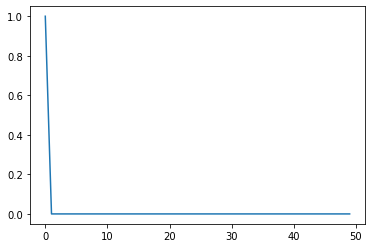

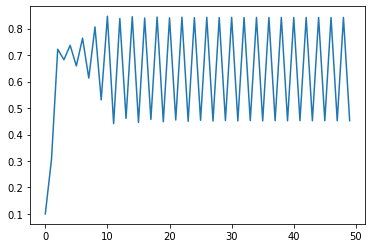

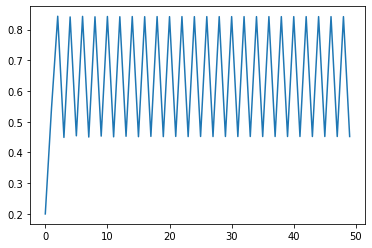

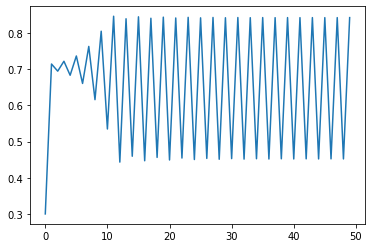

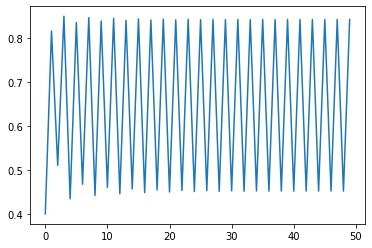

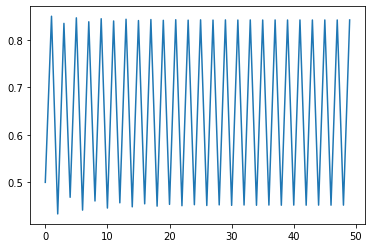

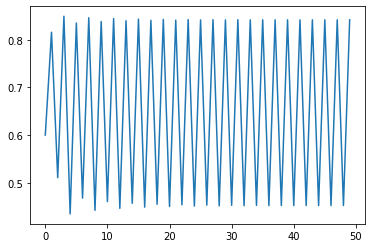

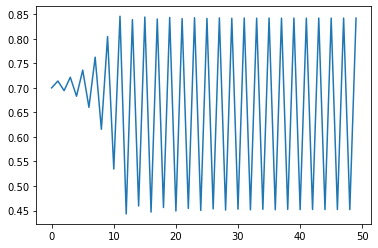

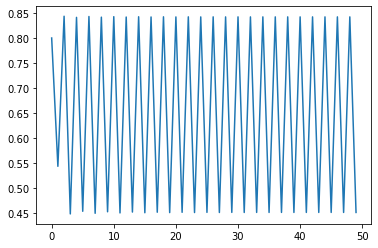

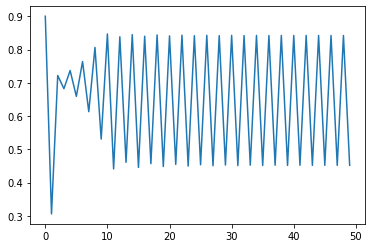

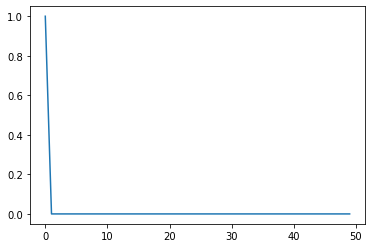

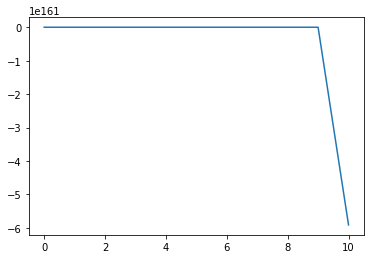

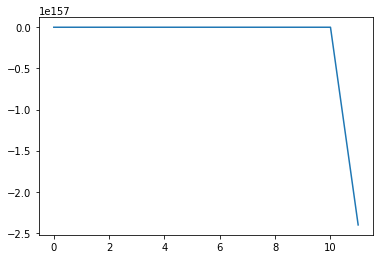

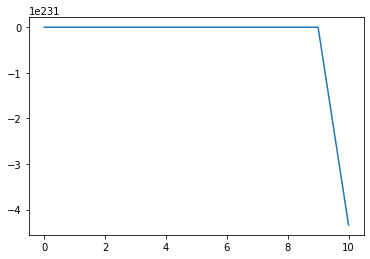

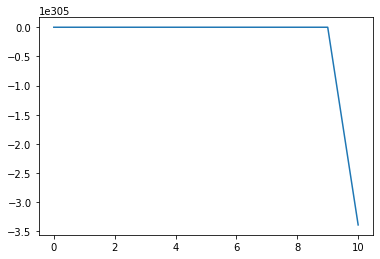

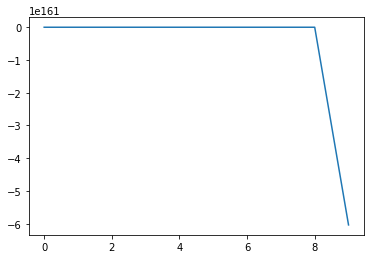

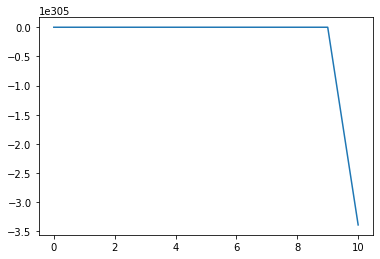

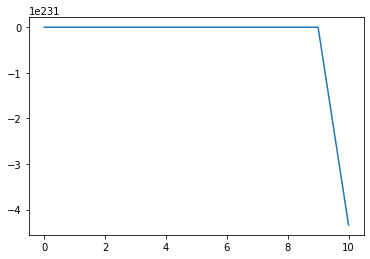

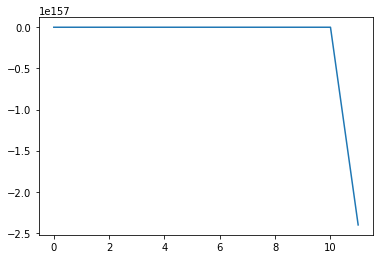

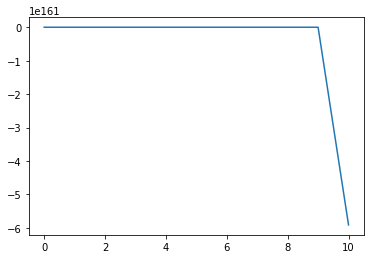

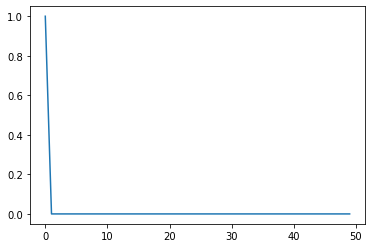

In [42]:
def task1(x, i, starting_value, a):
    if(i == 0):
        return starting_value
    else:
        return f(a, x[i-1])
def f(a, x):
    z = a * x * (1 - x)
    return z

a = 1
starting_value = 1
n = 50
x = []
alphas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.4, 5.52]
exes = [0.1, 0.2,0.3,0.4,0.5, 0.6,0.7,0.8,0.9,1.0]


numbers = []
for i in range(50):
    numbers.append(i)
i = 0
j = 0

for i in range(len(alphas)):
    a = alphas[i]
    for j in range(len(exes)):
        starting_value = exes[j]
        x = []
        k = 0
        for k in range(n):
            x.append(task1(x, k, starting_value, a))
        plt.plot(numbers, x)
        plt.show()
#         uncomment above to show graphs, commented out to not occupy too much space
        


                   

### Observations
The graph steadies at a few alpha values and for some the value fluctuates with varying degrees as can be seen from the above graphs.

## Task-2
Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps.



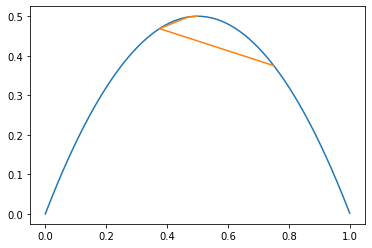

In [4]:
def task1(x, i, starting_value, a):
    if(i == 0):
        return starting_value
    else:
        return f(a, x[i-1])
def f(a, x):
    z = a * x * (1 - x)
    return z
a = 2
starting_value = 0.75

y = []
xaxis = np.arange(0,1,0.001)

for i in range(len(xaxis)):
    y.append(f(a,xaxis[i]))
    
plt.plot(xaxis,y)

prev = []
arr = []
k = 0

nexta = []
for k in range(n+1):
    arr.append(task1(arr, k, starting_value, a))

i = 0
for i in range(0,n):
    val = arr[i]
    prev.append(val)
i = 1
for i in range(1,n+1):
    val = arr[i]
    nexta.append(val)

plt.plot(prev,nexta)
plt.show()



## Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$.<br>

Solution: consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$.  


### Strategy to solve this task: to find the steady-state or cycle for a given $\alpha$

1. Find roots of $f^{(n)}-x=0$, where $f^{(n)}$ is the $n^{th}$ iteration of the map; i.e. $f^{(3)}(x)=f(f(f(x)))$
2. Check the stability of the roots. 
1. If all roots are unstable, then increase n by 1 and goto step 1
1. If even one root is stable, then we have found the steady-state/cycle.

Alternatively: 
$ \frac{d}{dx} f^{(n)}(x) = \frac{df(x_{n-1})}{dx}  \frac{d}{dx} f^{(n-1)}(x)  = \left[\alpha (1-2 x_{n-1})\right] \frac{d}{dx} f^{(n-1)}(x_{n-1}) $, which is a recursive formula for the derivative!

\begin{eqnarray}
\text{ Denote } x_n &= f^{(n)}(x) \\
\frac{d}{dx} f^{(n)}(x) & = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) =
                     \left[\alpha (1-2 x_{(n-1)})\right] \frac{d}{dx} x_{(n-1)} \\
 \text{ with } x_0 = x \implies \frac{d}{dx} x_0 = 1
\end{eqnarray}

$$ \frac{d}{dx} f^{(n)}(x)  = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) = f^\prime(x_{(n-1)}) \frac{d}{dx} x_{(n-1)} \text{ where }f^\prime(x)=\alpha (1-2x) \text{ and }\frac{d}{dx}x_0 = 1$$

So that $$\frac{d}{dx} f^{(n)}(x) = f^\prime(x_{n-1})~f^\prime(x_{n-2})~\cdots f^\prime(x_{2})~ f^\prime(x_{1})~f^\prime(x_0)\text{ where }x_0=x\text{ and }x_n=f^{(n)}(x_0)$$
and use `scipy.optimize.fixed_point`



alpha = 3
x_0 = 0.75
After 5 iterations:
Fixed Point found at x = 0.7499999999999994


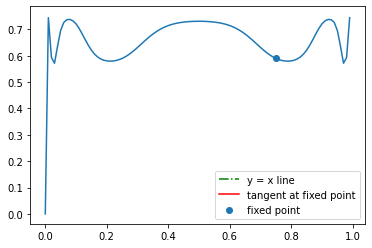

In [45]:

n = 1
a = 3
x = 0.75

def f(a, x):
    z = a * x * (1 - x)
    return z
def fn(a,x,n):
    nm = x
    for i in range(n):
       nm = f(a,nm)
    return nm
x_axis = np.arange(0, 1, 0.01)



def derivative(x ,a ,n):
    del_x = 0.000000000001
    return (fn(a, x+del_x,n) - fn(a,x,n)) / del_x
stable_root_found = 0;

#when stable root found, we stop going to next n
def is_system_stable(roots, alpha, n):
    return abs(derivative(roots[-1],alpha,n)) <= 1

def tang(xv,x,y,m):
    return m*(xv-x) + y

#finding fixed point = f(x) = x. Finding x. Or finding root of f(x) - x
while(not(stable_root_found)):
    roots = []
    for i in range(n):
        roots.append(float(opt.fixed_point(fn, x, args=(a,i))))
    stable_root_found = is_system_stable(roots,a,n)
    n+=1

    
y_axis = fn(a,x_axis,n)
plt.plot(x_axis, y_axis)
    
print()    
print("alpha = "+str(a)+"\nx_0 = "+str(x))
print("After "+str(n)+" iterations:")
print("Fixed Point found at x = " +str(roots[-1]))

plt.plot(x,x,'-.',label='y = x line',color="green")
plt.scatter(roots[-1],fn(a,roots[-1],n) , label = "fixed point")

plt.plot(x,tang(x,roots[-1],fn(a,roots[-1],n),derivative(roots[-1],a,n)),label = "tangent at fixed point",color="red")

plt.legend()

    

### Observation 
The fixed point fails to converge to the correct value for certain values of alpha < 1.



## Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.



Text(0.5, 1.0, 'Bifurcation diagram')

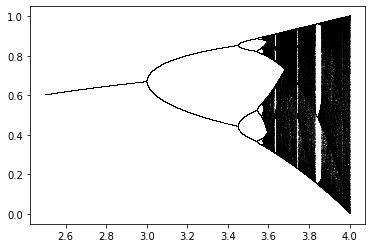

In [41]:
def f(r, x):
    return r * x * (1 - x)

n = 10000
#make array
r = np.linspace(2.5, 4.0, n)
#number of iterations
iterations = 1000
#We use 1000 iterations of the logistic map and keep the last 100 iterations to display the bifurcation diagram
last = 100
#We initialize system with initial condition x0=0.00001:
x = 1e-5 * np.ones(n)
for i in range(iterations):
    x = f(r, x)
    if i >= (iterations - last):
        plt.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")


### Observation
We will draw the system's bifurcation diagram, which shows the possible long-term behaviors (equilibria, fixed points, periodic orbits, and chaotic trajectories) as a function of the system's parameter.


## Task-5
Find the ratio between two consequtive bifurcations.